# Which Debts Are Worth the Bank's Effort?
##### Play bank data scientist and use regression discontinuity to see which debts are worth collecting.


In [146]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [147]:
#loading the bank dataset
df=pd.read_csv('E:/technocolab intern/bank_data.csv')

# Understanding the data 

In [148]:
df.shape

(1882, 6)

In [149]:
df.head(3)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.54,Level 0 Recovery,19,Male
1,1150,486,416.09,Level 0 Recovery,25,Female
2,380,527,429.35,Level 0 Recovery,27,Male


In [150]:
df.tail()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


In [151]:
df.dtypes

id                            int64
expected_recovery_amount      int64
actual_recovery_amount      float64
recovery_strategy            object
age                           int64
sex                          object
dtype: object

In [152]:
df.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [153]:
df.info

<bound method DataFrame.info of         id  expected_recovery_amount  actual_recovery_amount  \
0     2030                       194              263.540000   
1     1150                       486              416.090000   
2      380                       527              429.350000   
3     1838                       536              296.990000   
4     1995                       541              346.385000   
...    ...                       ...                     ...   
1877   361                      9785            15388.195990   
1878   196                      9857             9709.909257   
1879   313                      9859            30209.181790   
1880  1781                      9920            20386.232190   
1881   522                      9964            16706.305920   

     recovery_strategy  age     sex  
0     Level 0 Recovery   19    Male  
1     Level 0 Recovery   25  Female  
2     Level 0 Recovery   27    Male  
3     Level 0 Recovery   25    Male  
4     Lev

In [154]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'expected_recovery_amount'}>],
       [<Axes: title={'center': 'actual_recovery_amount'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

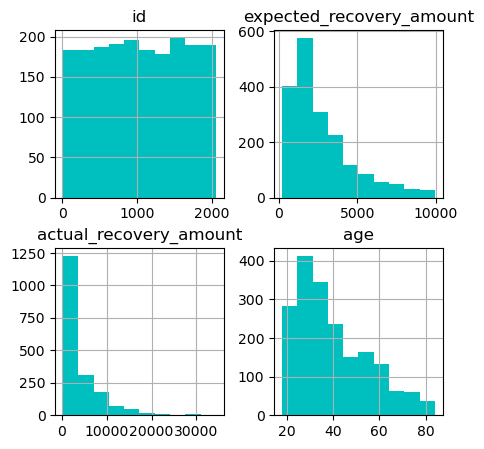

In [155]:
df.hist( figsize=(5,5),color='c')

In [156]:
df.count()

id                          1882
expected_recovery_amount    1882
actual_recovery_amount      1882
recovery_strategy           1882
age                         1882
sex                         1882
dtype: int64

# Data pre-processing

In [157]:
df.isna().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [158]:
df.drop("id",axis=1,inplace=True)

In [159]:
df.head()

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,194,263.540,Level 0 Recovery,19,Male
1,486,416.090,Level 0 Recovery,25,Female
2,527,429.350,Level 0 Recovery,27,Male
3,536,296.990,Level 0 Recovery,25,Male
4,541,346.385,Level 0 Recovery,34,Male


In [160]:
df.columns

Index(['expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [161]:
df.describe()

,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000
mean,2759.967588,4000.967837,39.650372
std,2019.826565,4576.506350,15.453072
min,194.000000,200.425000,18.000000
25%,1261.250000,1045.190300,28.000000
50%,2062.000000,2115.446373,35.000000
75%,3569.500000,5417.237207,50.000000
max,9964.000000,34398.479710,84.000000


# Data visualization

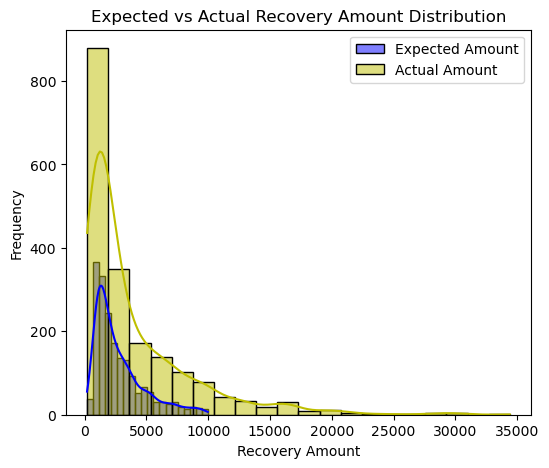

In [162]:
# Histogram for Expected vs Actual Recovery Amount Distribution
plt.figure(figsize=(6,5))
sns.histplot(df['expected_recovery_amount'], bins=20, kde=True, color='b', label='Expected Amount')
sns.histplot(df['actual_recovery_amount'], bins=20, kde=True, color='y', label='Actual Amount')
plt.title('Expected vs Actual Recovery Amount Distribution')
plt.xlabel('Recovery Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

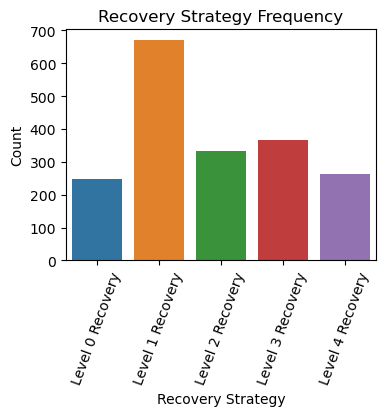

In [163]:
# Bar plot for recovery strategy frequency
plt.figure(figsize=(4,3))
sns.countplot(x='recovery_strategy', data=df)
plt.title('Recovery Strategy Frequency')
plt.xlabel('Recovery Strategy')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

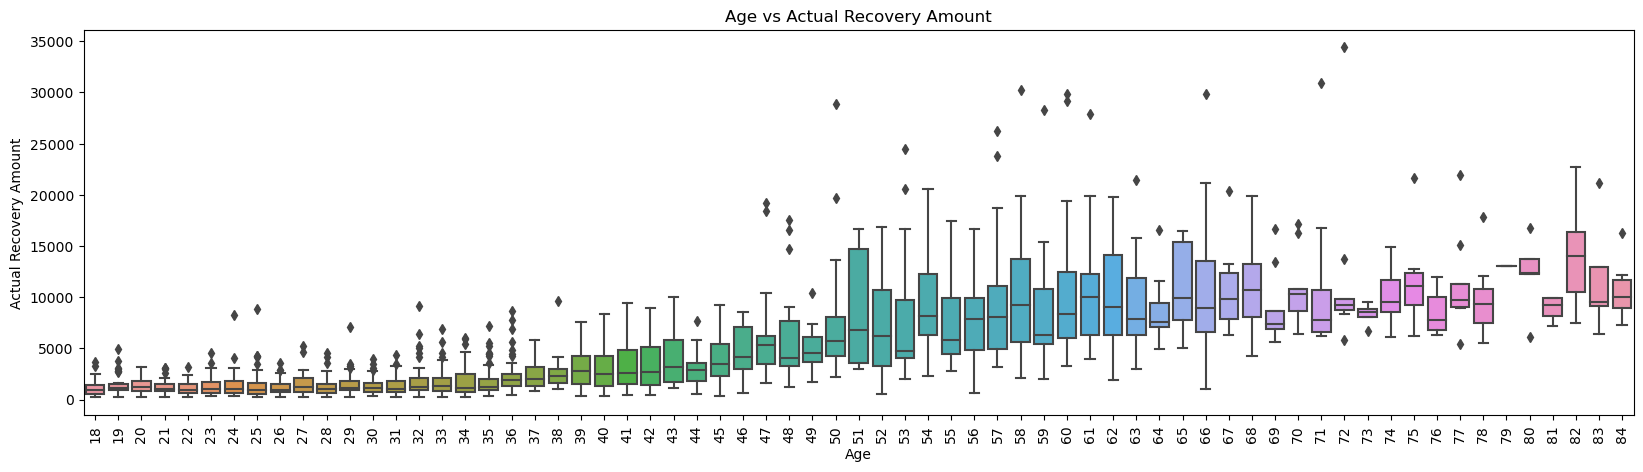

In [164]:
#Box plot for Age vs Actual Recovery Amount
plt.figure(figsize=(20,5))
sns.boxplot(x='age', y='actual_recovery_amount', data=df)
plt.title('Age vs Actual Recovery Amount')
plt.xlabel('Age')
plt.ylabel('Actual Recovery Amount')
plt.xticks(rotation=90)
plt.show()

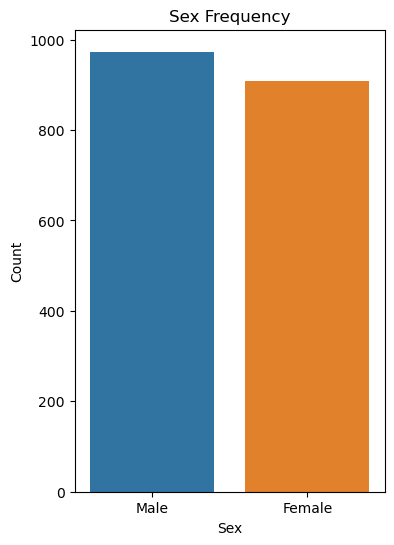

In [165]:
# Bar plot for Sex
plt.figure(figsize=(4, 6))
sns.countplot(x='sex', data=df)
plt.title('Sex Frequency')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Graphical exploratory data analysis

In [166]:
# Extract the relevant columns 
expected_recovery_amount = df['expected_recovery_amount']
age = df['age']

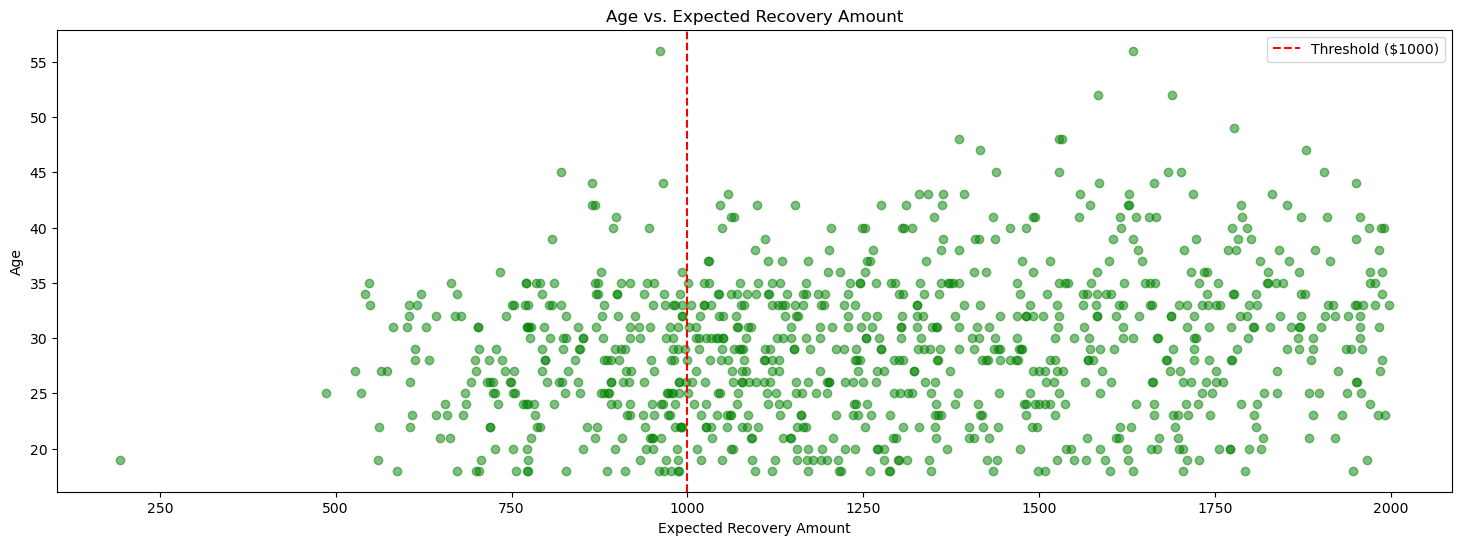

In [167]:
# Filter data for Expected Recovery Amount between $0 and $2000
window_mask = (expected_recovery_amount >= 0) & (expected_recovery_amount <= 2000)
age_window = age[window_mask]
expected_recovery_window = expected_recovery_amount[window_mask]

# Create the scatter plot
plt.figure(figsize=(18, 6))
plt.scatter(expected_recovery_window, age_window,c='g', alpha=0.5)
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold ($1000)')
plt.title('Age vs. Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend()
plt.show()

# Statistical test: age vs. expected recovery amount

In [168]:
# Create a mask for Expected Recovery Amount between 900-1100
range_mask = (expected_recovery_amount >= 900) & (expected_recovery_amount <= 1100)

# Filter data for the range from 900-1100
age_range = age[range_mask]
     

# Create masks for data just above and just below $1000 threshold
above_threshold_mask = expected_recovery_amount > 1000
below_threshold_mask = expected_recovery_amount <= 1000

# Get the ages of customers just above and just below the threshold
age_above_threshold = age_range[above_threshold_mask[range_mask]]
age_below_threshold = age_range[below_threshold_mask[range_mask]]
     

# Perform the t-test
t_stat, p_value = stats.ttest_ind(age_above_threshold, age_below_threshold, equal_var=False)

# Display the results
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: 1.6090357512691353
p-value: 0.10938147433215123




The difference between the mean ages of customers who are slightly above and below the $1000 threshold is measured by the t-statistic.

In this case, the chosen significance level (0.05) is exceeded by the p-value (0.109). 

The null hypothesis, which states that there is no significant difference in the average age of customers who are just above and below the $1000 threshold, is therefore not strongly supported by the data.

The findings indicate that there is no statistically significant difference in the two groups' average ages.

Given that the p-value exceeds 0.05, the null hypothesis cannot be rejected.


# Statistical test: sex vs. expected recovery amount

In [169]:
# Number of customers in each category
crosstab = pd.crosstab(df.loc[(df['expected_recovery_amount']<1100) & (df['expected_recovery_amount']>=900)]['recovery_strategy'],df['sex'])
print(crosstab)

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55


In [170]:
# Extract the relevant columns for the analysis
sex = df['sex']
expected_recovery_amount = df['expected_recovery_amount']
     

#Filter data for the range from 900-1100

# Create a mask for Expected Recovery Amount between 900-1100
range_mask = (expected_recovery_amount >= 900) & (expected_recovery_amount <= 1100)

# Filter data for the range from 900-1100
sex_range = sex[range_mask]
     

# Create a contingency table for the chi-square test

# Create a contingency table
contingency_table = pd.crosstab(sex_range, expected_recovery_amount[range_mask] > 1000)

# Rename the columns for clarity
contingency_table.columns = ['Below_Threshold', 'Above_Threshold']
     

#Perform the chi-square test

# Perform the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)

Chi-Square Statistic: 0.49435761688866475
p-value: 0.48198988397369014




The correlation between a customer's sex and their Expected Recovery Amount group (beyond or below the $1000 threshold) is measured by the Chi-Square Statistic (0.494). The likelihood of discovering the Chi-Square Statistic by chance, assuming that there is no correlation between the variables, is indicated by the p-value (0.482).

The selected significance threshold, such as 0.05, is exceeded by the p-value (0.482). The null hypothesis, which contends that there is no meaningful relationship between the sex of the customers and their Expected Recovery Amount group, is therefore not strongly supported by the data. We can infer from the data that the percentage of male customers who are just above and just below the $1000 threshold does not differ statistically significantly.


# Exploratory graphical analysis: recovery amount

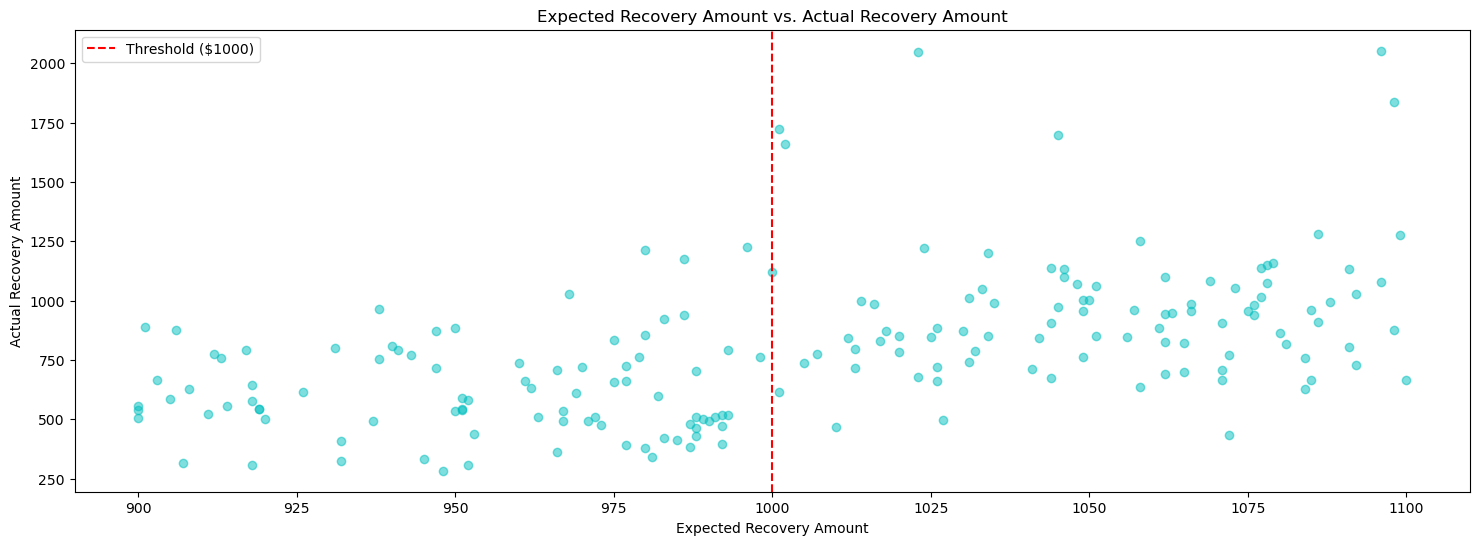

In [171]:
# Extract the relevant columns for the scatter plot
expected_recovery_amount = df['expected_recovery_amount']
actual_recovery_amount = df['actual_recovery_amount']
     

# Create a mask for Expected Recovery Amount between 900-1100
range_mask = (expected_recovery_amount >= 900) & (expected_recovery_amount <= 1100)

# Filter data for the range from 900-1100
expected_recovery_range = expected_recovery_amount[range_mask]
actual_recovery_range = actual_recovery_amount[range_mask]
     

plt.figure(figsize=(18, 6))
plt.scatter(expected_recovery_range, actual_recovery_range,c='c', alpha=0.5)
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold ($1000)')
plt.title('Expected Recovery Amount vs. Actual Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend()
plt.show()
     

# Statistical analysis: recovery amount

In [172]:
# Extract the relevant columns for the analysis
actual_recovery_amount = df['actual_recovery_amount']
recovery_strategy = df['recovery_strategy']
     

# Create a mask for Expected Recovery Amount between 900-1100
window1_mask = (expected_recovery_amount >= 900) & (expected_recovery_amount <= 1100)

# Filter data for the range from 900-1100
actual_recovery_window1 = actual_recovery_amount[window1_mask]
     

# Create a mask for Expected Recovery Amount between 950-1050
window2_mask = (expected_recovery_amount >= 950) & (expected_recovery_amount <= 1050)

# Filter data for the range from 950-1050
actual_recovery_window2 = actual_recovery_amount[window2_mask]
     

#Performing the Kruskal-Wallis test
     

# Perform the Kruskal-Wallis test for the first window
kruskal_result1 = stats.kruskal(actual_recovery_window1[expected_recovery_amount[window1_mask] <= 1000],
                                actual_recovery_window1[expected_recovery_amount[window1_mask] > 1000])

# Perform the Kruskal-Wallis test for the second window
kruskal_result2 = stats.kruskal(actual_recovery_window2[expected_recovery_amount[window2_mask] <= 1000],
                                actual_recovery_window2[expected_recovery_amount[window2_mask] > 1000])

# Display the results
print("Kruskal-Wallis Test Result for Window 1:")
print("Statistic:", kruskal_result1.statistic)
print("p-value:", kruskal_result1.pvalue)

print("\nKruskal-Wallis Test Result for Window 2:")
print("Statistic:", kruskal_result2.statistic)
print("p-value:", kruskal_result2.pvalue)

Kruskal-Wallis Test Result for Window 1:
Statistic: 64.89840778685254
p-value: 7.886077128395961e-16

Kruskal-Wallis Test Result for Window 2:
Statistic: 30.9924872487249
p-value: 2.5902913533269003e-08




The p-values for Window 1 and Window 2 are both significantly smaller than the selected significance level, such as 0.05. Consequently, we can draw the conclusion that, for both windows, there is a notable discontinuity in the actual recovery amount above the $1000 threshold.

The null hypothesis is strongly refuted by the small p-values, which indicate that there are notable variations in the two groups' actual recovery amounts above and below the $1000 threshold during each window.


# Regression modeling: no threshold

In [173]:
# Extract the relevant columns for Model 1
X_model1 = df['expected_recovery_amount']
y_model1 = df['actual_recovery_amount']
     

#Build Model 1
     

# Add a constant term to the input (expected recovery amount) for the regression model
X_model1 = sm.add_constant(X_model1)

# Fit the linear regression model
model1 = sm.OLS(y_model1, X_model1).fit()

# Print the model summary
print(model1.summary())
     

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                            21:29:24   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

# Regression modeling: adding true threshold

In [174]:
# Extract the relevant columns for the second model
X_model2 = df['expected_recovery_amount']
y_model2 = df['actual_recovery_amount']
     

#Add an indicator variable for the true threshold
     

# Create a dummy variable for whether the expected recovery amount is above the $1000 threshold
df['above_threshold'] = (df['expected_recovery_amount'] > 1000).astype(int)

# Add the indicator variable to the input (expected recovery amount) for the regression model
X_model2 = sm.add_constant(X_model2)
X_model2['above_threshold'] = df['above_threshold']
y_model2 = df['actual_recovery_amount']     

#Build Model 2 - Linear Regression with Threshold Indicator
     

# Fit the linear regression model
model2 = sm.OLS(y_model2, X_model2).fit()

# Print the model summary
print(model2.summary())
     

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                            21:29:25   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

# Regression modeling: adjusting the window

In [175]:
#Extract the relevant columns for the analysis
expected_recovery_amount = df['expected_recovery_amount']
actual_recovery_amount = df['actual_recovery_amount']
     

#Filter data for the range from 950-1050
     

# Create a mask for Expected Recovery Amount between 950-1050
window_mask = (expected_recovery_amount >= 950) & (expected_recovery_amount <= 1050)

# Filter data for the range from 950-1050
actual_recovery_window = actual_recovery_amount[window_mask]
above_threshold = (expected_recovery_amount[window_mask] > 1000).astype(int)
     

#Build Model - Linear Regression with Threshold Indicator for the new window
     

# Add a constant term to the input (expected recovery amount) for the regression model
X_window = sm.add_constant(expected_recovery_amount[window_mask])

# Add the indicator variable to the input for the regression model
X_window['above_threshold'] = above_threshold

# Fit the linear regression model
model_window = sm.OLS(actual_recovery_window, X_window).fit()

# Print the model summary
print(model_window.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           2.42e-07
Time:                            21:29:27   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------